In [33]:
# les libraires pour faire le travail
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.ticker import PercentFormatter

# Lire le fichier

In [3]:
df = pd.read_csv('./input/daily_return_mc.csv')

In [4]:
df.head()
df.isna().sum() # on a verifie qu'il y a pas de Nan

GLD    0
IWM    0
QQQ    0
SPY    0
TLT    0
dtype: int64

In [5]:
# Calculer la matrice de covariance
matrix_cov = df.cov()
matrix_cov

GLD       IWM       QQQ       SPY       TLT
GLD  0.000068 -0.000013 -0.000013 -0.000011  0.000022
IWM -0.000013  0.000107  0.000087  0.000075 -0.000029
QQQ -0.000013  0.000087  0.000113  0.000082 -0.000023
SPY -0.000011  0.000075  0.000082  0.000070 -0.000023
TLT  0.000022 -0.000029 -0.000023 -0.000023  0.000056

In [6]:
# Calculer la moyenne
mean = df.mean(axis = 0)
mean

GLD    0.000155
IWM    0.000291
QQQ    0.000628
SPY    0.000438
TLT    0.000371
dtype: float64

In [57]:
#Fonction pour calculer le profit et on va simuler 252 jours( C'est a dire un an) de valeurs, et on simule 100 fois (Apres on peut faire n'importe quelle fois, parce que ca fait trop longtemps pour faire 10000 fois)
def calcul_portofolio(mean, matrix_cov, poids_array) :
    list_df = []
    list_portofolio = []
    list_monte_carlo = []
    for i in range(100) : 
            # Un boucle pour simuler 100 ans de valeurs des actions
            list_monte_carlo = []
            for i in range(252):
                # Un boucle pour 252 jours ouverts de la bourse
                    var = multivariate_normal.rvs(mean, matrix_cov)
                    list_monte_carlo.append(var)
            df_monte_carlo = pd.DataFrame((list_monte_carlo), columns = ['GLD','IWM','QQQ','SPY','TLT'])
            poids = np.array(poids_array) # Ici, on doit utiliser la solution optimale qu'on a calcule pour les poids
            profit = df_monte_carlo.mul(poids, axis=1).sum(axis = 1) # Ici, on calcule le profit de chaque jour
            df_monte_carlo['Profit'] = profit
            profit_annuel = profit.sum()
            list_portofolio.append(profit_annuel)    # On concaterer les profits de les 100 ans pour estimer la probabilite de chaque annee
            list_df.append(df_monte_carlo)
    return list_portofolio

list_portofolio_balance = calcul_portofolio(mean, matrix_cov, [0.2,0.2,0.2,0.2,0.2])
max_sharpe_weight = [0.069579, 0.007574, 0.290209, 0.134740, 0.497899] # On charge les poids potimals qu'on a calcule avec sharpe ratio
max_omega_weight = [0.007380, 0.104033, 0.784399, 0.078126, 0.026061] # On charge les poids potimals qu'on a calcule avec omega ratio
list_portofolio_sharpe = calcul_portofolio(mean, matrix_cov, max_sharpe_weight)
list_portofolio_omega = calcul_portofolio(mean, matrix_cov, max_omega_weight)


In [12]:
len(list_portofolio)

100

In [58]:
neg_count = len(list(filter(lambda x: (x < 0), list_portofolio_balance))) 
pos_count = len(list(filter(lambda x: (x > 0), list_portofolio_balance))) 
Possibilite_perte_balance = neg_count/ len(list_portofolio_balance)
Possibilite_gagnant_balance = pos_count/ len(list_portofolio_balance)
print("Possibilite de gagnant avec tous les memes poids", Possibilite_gagnant_balance)
print("Possibilite de perte avec tous les memes poids",Possibilite_perte_balance)

# Sharpe ratio
neg_count_sharpe = len(list(filter(lambda x: (x < 0), list_portofolio_sharpe))) 
pos_count_sharpe = len(list(filter(lambda x: (x > 0), list_portofolio_sharpe))) 
Possibilite_perte_sharpe = neg_count_sharpe/ len(list_portofolio_sharpe)
Possibilite_gagnant_sharpe = pos_count_sharpe/ len(list_portofolio_sharpe)
print("Possibilite de gagnant avec poids optimals de Sharpe ratio", Possibilite_gagnant_sharpe)
print("Possibilite de perte avec poids optimals de Sharpe ratio" ,Possibilite_perte_sharpe)

# Omega ratio
neg_count_omega = len(list(filter(lambda x: (x < 0), list_portofolio_omega))) 
pos_count_omega = len(list(filter(lambda x: (x > 0), list_portofolio_omega))) 
Possibilite_perte_omega = neg_count_omega/ len(list_portofolio_omega)
Possibilite_gagnant_omega = pos_count_omega/ len(list_portofolio_omega)
print("Possibilite de gagnant", Possibilite_gagnant_omega)
print("Possibilite de perte",Possibilite_perte_omega)

Possibilite de gagnant avec tous les memes poids 0.9
Possibilite de perte avec tous les memes poids 0.1
Possibilite de gagnant avec poids optimals de Sharpe ratio 0.94
Possibilite de perte avec poids optimals de Sharpe ratio 0.06
Possibilite de gagnant 0.82
Possibilite de perte 0.18


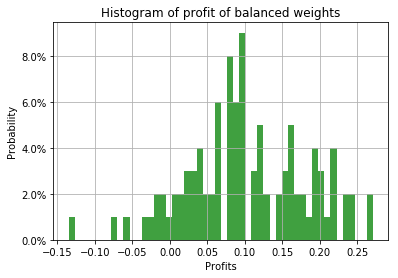

In [60]:
# Plot the distribution of the profit
# the histogram of the data
n, bins, patches = plt.hist(list_portofolio_balance, 50,  facecolor='g', alpha=0.75, weights=np.ones(len(list_portofolio_balance)) / len(list_portofolio_balance))
plt.xlabel('Profits')
plt.ylabel('Probability')
plt.title('Histogram of profit of balanced weights')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Sur ce graph, vous pouvez voir que pour chaque valeur de profit qu'on a combien de probabilite de tomber dans ce cas.

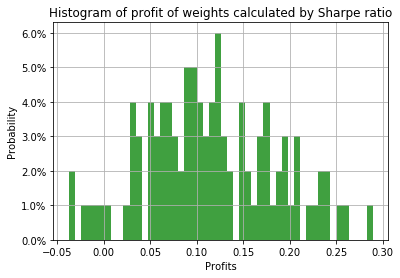

In [61]:
# Plot the distribution of the profit
# the histogram of the data
n, bins, patches = plt.hist(list_portofolio_sharpe, 50,  facecolor='g', alpha=0.75, weights=np.ones(len(list_portofolio_sharpe)) / len(list_portofolio_sharpe))
plt.xlabel('Profits')
plt.ylabel('Probability')
plt.title('Histogram of profit of weights calculated by Sharpe ratio')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

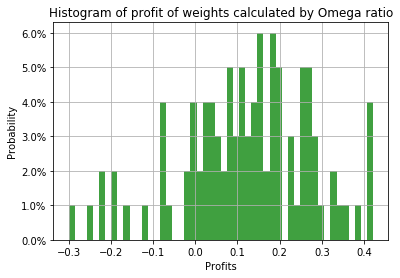

In [62]:
# Plot the distribution of the profit
# the histogram of the data
n, bins, patches = plt.hist(list_portofolio_omega, 50,  facecolor='g', alpha=0.75, weights=np.ones(len(list_portofolio_omega)) / len(list_portofolio_omega))
plt.xlabel('Profits')
plt.ylabel('Probability')
plt.title('Histogram of profit of weights calculated by Omega ratio')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()